******************************************************************************
*Tree    :output    : output                                                 *
*Entries :    12617 : Total =        58567615 bytes  File  Size =   23697584 *
*        :          : Tree compression factor =   2.47                       *
******************************************************************************
*Br    0 :mcpdg     : mcpdg/I                                                *
*Entries :    12617 : Total  Size=      51101 bytes  File Size  =        468 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression= 108.15     *
*............................................................................*
*Br    1 :mcx       : mcx/D                                                  *
*Entries :    12617 : Total  Size=     101709 bytes  File Size  =      80884 *
*Baskets :        4 : Basket Size=      32000 bytes  Compression=   1.25     *
*...................................................

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


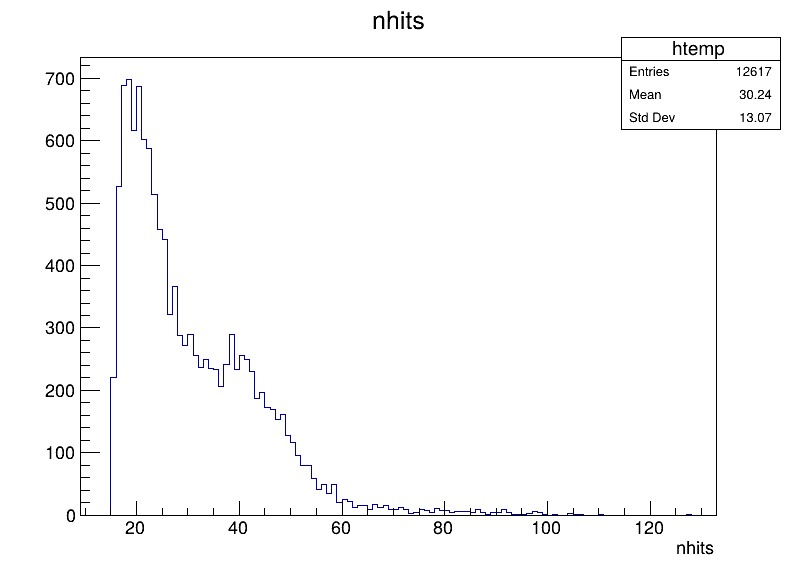

In [3]:
import ROOT
f = ROOT.TFile.Open("output.ntuple.root")
output = f.Get("output")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
output.Draw("nhits")
c.Draw()
output.Print()

In [ ]:
import ROOT
f = ROOT.TFile.Open("muon_water_trig2.0.1000.root")
output = f.Get("output")
c2 = ROOT.TCanvas("Muon NHits","Muon NHits",800,600)
output.Draw("nhits")
c2.Draw()

In [ ]:
import ROOT
f = ROOT.TFile.Open("muon_water_trig2.0.1000_trk.root")
output = f.Get("output")
c3 = ROOT.TCanvas("Muon NHits 1000 Evts","Muon NHits 1000 Events",800,600)
output.Draw("nhits", "nhits<300")
c3.Draw()

In [ ]:
import ROOT
c3 = ROOT.TCanvas("mcPEx","mcPEx",800,600)
output.Draw("mcPEx", "nhits<300")
c3.Draw()
c4 = ROOT.TCanvas("mcPEz","mcPEz",800,600)
output.Draw("mcPEz", "nhits<300")
c4.Draw()

c5 = ROOT.TCanvas("mcPEy","mcPEy",800,600)
output.Draw("mcPEy", "nhits<300")
c5.Draw()

In [ ]:
c5 = ROOT.TCanvas("mcpdg","mcpdg",800,600)
output.Draw("mcpdg", "nhits < 300")
c5.SetLogy();
c5.Draw()

In [ ]:
c5 = ROOT.TCanvas("trackPDG","trackPDG",800,600)
output.Draw("trackPDG", "nhits < 300")
c5.SetLogy();
c5.Draw()

In [ ]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
df = ROOT.RDataFrame("output","muon_water_trig2.0.1000_trk.root")
nhits = df.AsNumpy(columns=["nhits"])["nhits"]
print(nhits.shape)
plt.hist(nhits, bins=np.arange(-0.5,255.5,10))
plt.show()

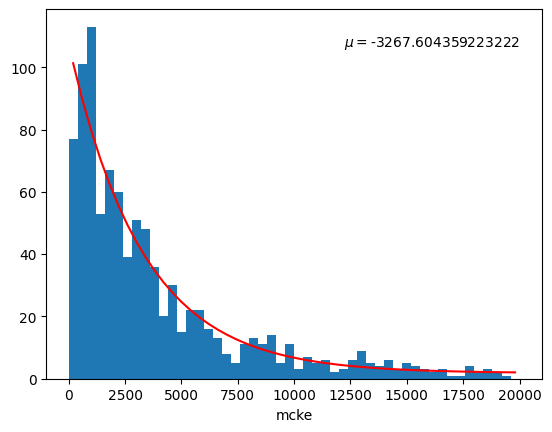

Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >


In [28]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
df = ROOT.RDataFrame("output","muon_water_trig2.0.1000_trk.root")
mcke = df.AsNumpy(columns=["mcke"])["mcke"]
mcpdg = df.AsNumpy(columns=["mcpdg"])["mcpdg"]
plt.hist(mcke, bins=np.arange(-0.5,20000,400))
ax =plt.gca()
histy,histx = np.histogram(mcke, bins=np.arange(-0.5,20000,400))
plt.xlabel("mcke")
bin_centers =[]
for ie in range(1,len(histx)):
    bin_centers.append((histx[ie]+histx[ie-1])/2)
bin_centers = np.array(bin_centers)
#print(bin_centers)

from scipy.optimize import curve_fit
def expfit(x,a,b,mean):
    return a+b*np.exp(mean*x)

param0 = (0,100,-0.0001)
paramfit, paramErr = curve_fit(expfit,bin_centers,histy,param0)
#print(paramfit[2])
#print(3*paramfit[2])
fitfun = expfit(bin_centers,paramfit[0],paramfit[1],paramfit[2])
plt.plot(bin_centers, fitfun, "r-")
plt.text(0.6,0.9,"$\mu=$"+ str(1/paramfit[2]), transform=ax.transAxes)
plt.show()



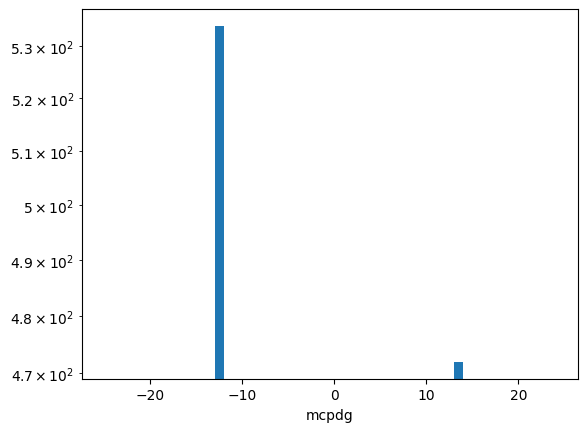

(1007,)
(1007,)


In [19]:

plt.hist(mcpdg, bins=np.arange(-25,25,1))
plt.yscale("log")
plt.xlabel("mcpdg")
plt.show()
print(mcke.shape)
print(mcpdg.shape)

In [ ]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
df = ROOT.RDataFrame("output","muon_water_trig2.0.1000_trk.root")
df = df.Filter("nhits < 250")
mcpdg = df.AsNumpy(columns=["mcpdg"])["mcpdg"]
print(mcpdg)
plt.hist(mcpdg,bins=np.arange(-14,14,1))
plt.show()

Reading in file  muon_water_trig2.0.1000_trk.root


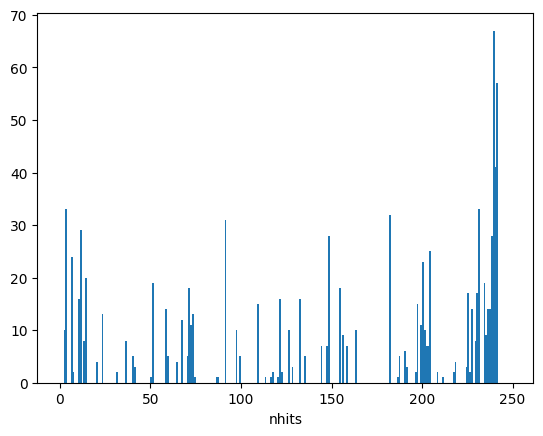

In [16]:
import uproot
import numpy  as np
import matplotlib.pyplot as plt

print('Reading in file ',"muon_water_trig2.0.1000_trk.root")

nhits,pe,time =  np.array([]),np.array([]),np.array([])

cut_cond = "( (nhits>0) & (nhits<250) )"

for array1 in uproot.iterate("muon_water_trig2.0.1000_trk.root:output",["nhits","triggerTime"],cut=cut_cond):
    _E,_T = array1["nhits"],array1["triggerTime"] 
    nhits.resize(len(nhits)+len(_E))
    nhits[-len(_E):] = _E
    time.resize(len(time)+len(_T))
    time[-len(_T):] = _T

plt.hist(nhits, bins=np.arange(0,250,1))
plt.xlabel("nhits")
plt.show()